In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [2]:
! pwd

/content


In [3]:
!git clone https://github.com/NSR9/chayvision.git /content/drive/MyDrive/ERAV1/chayvision_library

Cloning into '/content/drive/MyDrive/ERAV1/chayvision_library'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16 (delta 6), reused 14 (delta 4), pack-reused 0
Unpacking objects: 100% (16/16), 5.08 KiB | 20.00 KiB/s, done.


In [4]:
cd drive/MyDrive/ERAV1/chayvision_library


/content/drive/MyDrive/ERAV1/chayvision_library


In [5]:
pwd

'/content/drive/MyDrive/ERAV1/chayvision_library'

Importing Torch and required modules

In [6]:
!pip install torchsummary
from torchsummary import summary

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from model import Net
from model import model_summary
import utils
from utils import TrainLoop
from utils import DataProcessor
from utils import DataViewer
from utils import GetCorrectPredCount
#from utils import check_cuda, get_device, train_model, test_model, GetCorrectPredCount


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


CODE BLOCK: 2

Initializing DataProcessor, DataViewer and TrainingLoop classes

In [7]:
dataprocessor = DataProcessor()
dataviewer = DataViewer()
trainingloop = TrainLoop()

Checking for GPU

In [8]:
is_cuda_available = utils.check_cuda()
device = utils.get_device(is_cuda_available)

CUDA Available? True


Downloading the Dataset

In [9]:
data_transforms = dataprocessor.define_data_transforms()
train_data, test_data = dataprocessor.download_dataset(dataset_name="MNIST", data_transforms=data_transforms)


Loading the train and test data in dataloaders

In [10]:
batch_size = 512
train_loader, test_loader = dataprocessor.define_data_loaders(batch_size, train_data, test_data)

CODE BLOCK: 6

View some Training data

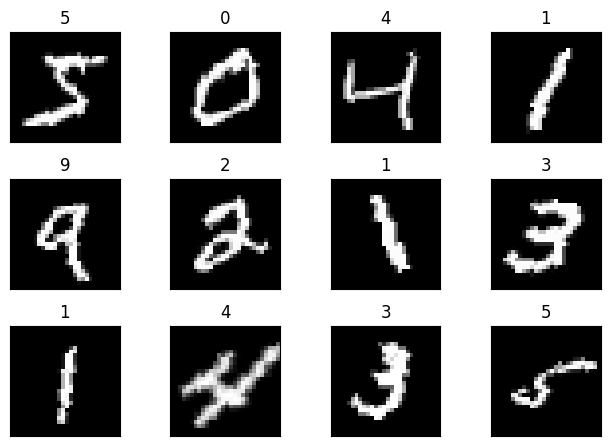

In [11]:
dataviewer.plot_train_data(train_loader)

View some Test data (If needed)

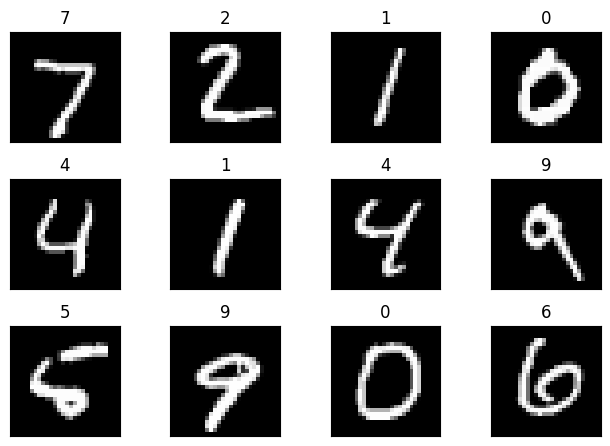

In [12]:
dataviewer.plot_test_data(test_loader)

Initialize the Model

In [13]:
model = Net().to(device)

Model Summary

In [14]:
modelsummary = model_summary(model)
print(model_summary)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
<function model_summary at 0x7f9f04c73910>


Define training parameters 

In [15]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
num_epochs = 20

Adjusting learning rate of group 0 to 1.0000e-02.


Initialize the training loop

In [16]:
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  trainingloop.train_model(model, device, train_loader, optimizer)
  trainingloop.test_model(model, device, test_loader)
  scheduler.step()

Epoch 1


Train: Loss=0.4348 Batch_id=117 Accuracy=48.10: 100%|██████████| 118/118 [00:22<00:00,  5.21it/s]


Test set: Average loss: 0.2869, Accuracy: 9114/10000 (91.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.3015 Batch_id=117 Accuracy=93.17: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.0983, Accuracy: 9700/10000 (97.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.3094 Batch_id=117 Accuracy=95.99: 100%|██████████| 118/118 [00:23<00:00,  4.95it/s]


Test set: Average loss: 0.0613, Accuracy: 9812/10000 (98.12%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.2847 Batch_id=117 Accuracy=97.06: 100%|██████████| 118/118 [00:23<00:00,  4.99it/s]


Test set: Average loss: 0.0532, Accuracy: 9824/10000 (98.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.2894 Batch_id=117 Accuracy=97.40: 100%|██████████| 118/118 [00:24<00:00,  4.75it/s]


Test set: Average loss: 0.0493, Accuracy: 9844/10000 (98.44%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 6


Train: Loss=0.2336 Batch_id=117 Accuracy=98.03: 100%|██████████| 118/118 [00:24<00:00,  4.88it/s]


Test set: Average loss: 0.0368, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.2306 Batch_id=117 Accuracy=98.11: 100%|██████████| 118/118 [00:22<00:00,  5.24it/s]


Test set: Average loss: 0.0356, Accuracy: 9885/10000 (98.85%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.1931 Batch_id=117 Accuracy=98.23: 100%|██████████| 118/118 [00:22<00:00,  5.22it/s]


Test set: Average loss: 0.0346, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.1976 Batch_id=117 Accuracy=98.17: 100%|██████████| 118/118 [00:23<00:00,  4.97it/s]


Test set: Average loss: 0.0348, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.1986 Batch_id=117 Accuracy=98.23: 100%|██████████| 118/118 [00:24<00:00,  4.85it/s]


Test set: Average loss: 0.0343, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 11


Train: Loss=0.1948 Batch_id=117 Accuracy=98.29: 100%|██████████| 118/118 [00:24<00:00,  4.72it/s]


Test set: Average loss: 0.0335, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 12


Train: Loss=0.1811 Batch_id=117 Accuracy=98.34: 100%|██████████| 118/118 [00:25<00:00,  4.72it/s]


Test set: Average loss: 0.0333, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


Train: Loss=0.1821 Batch_id=117 Accuracy=98.36: 100%|██████████| 118/118 [00:24<00:00,  4.75it/s]


Test set: Average loss: 0.0333, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


Train: Loss=0.1699 Batch_id=117 Accuracy=98.26: 100%|██████████| 118/118 [00:24<00:00,  4.88it/s]


Test set: Average loss: 0.0333, Accuracy: 9890/10000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.1878 Batch_id=117 Accuracy=98.35: 100%|██████████| 118/118 [00:22<00:00,  5.21it/s]


Test set: Average loss: 0.0331, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 16


Train: Loss=0.1748 Batch_id=117 Accuracy=98.34: 100%|██████████| 118/118 [00:23<00:00,  5.12it/s]


Test set: Average loss: 0.0331, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 17


Train: Loss=0.1771 Batch_id=117 Accuracy=98.31: 100%|██████████| 118/118 [00:24<00:00,  4.88it/s]


Test set: Average loss: 0.0331, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 18


Train: Loss=0.2314 Batch_id=117 Accuracy=98.29: 100%|██████████| 118/118 [00:24<00:00,  4.80it/s]


Test set: Average loss: 0.0331, Accuracy: 9890/10000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 19


Train: Loss=0.2039 Batch_id=117 Accuracy=98.33: 100%|██████████| 118/118 [00:24<00:00,  4.76it/s]


Test set: Average loss: 0.0331, Accuracy: 9890/10000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 20


Train: Loss=0.2121 Batch_id=117 Accuracy=98.28: 100%|██████████| 118/118 [00:24<00:00,  4.75it/s]


Test set: Average loss: 0.0331, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-06.


Plot Accuracy and Loss graphs

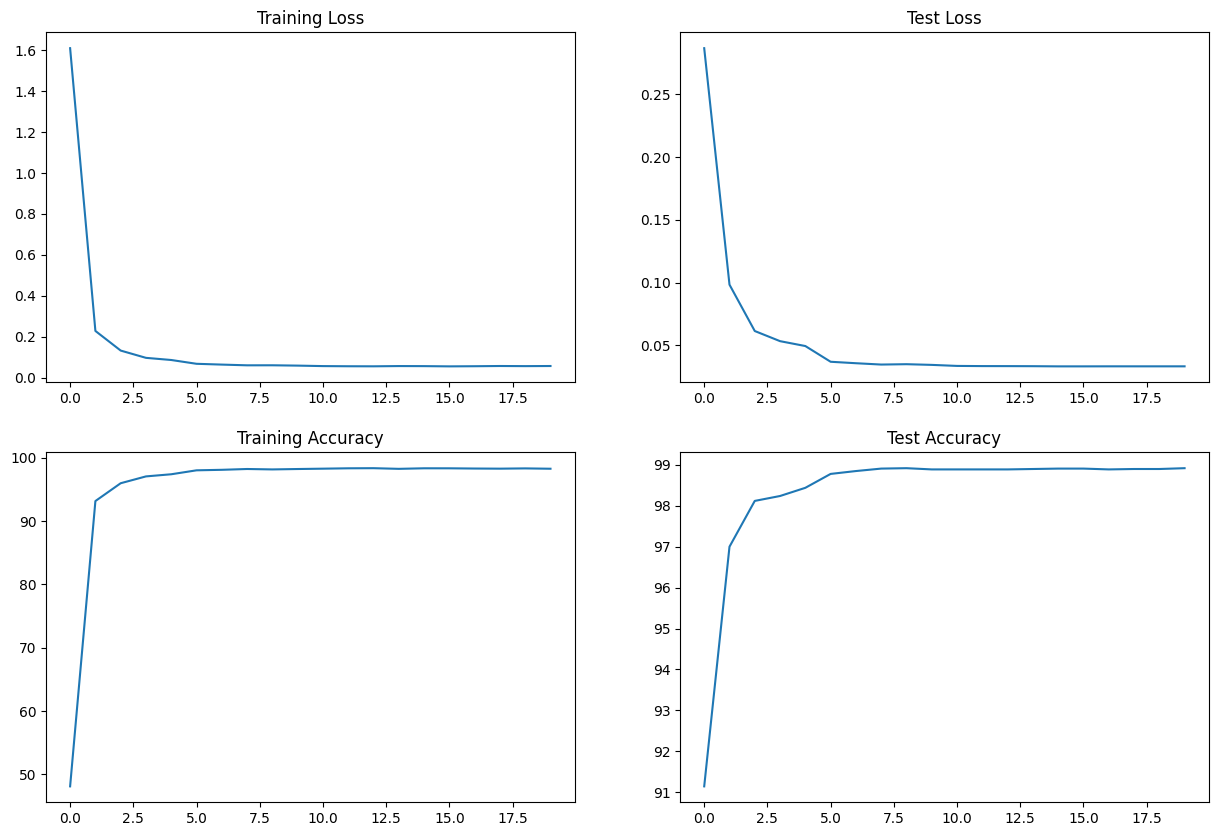

In [17]:
trainingloop.plot_graphs()